In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data_1A.csv")
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,28,admin.,single,university.degree,no,yes,no,telephone,may,fri,1128.0,3,999,0,nonexistent,no
1,1,30,admin.,single,university.degree,no,no,no,cellular,may,thu,199.0,1,999,0,nonexistent,no
2,2,49,self-employed,divorced,university.degree,no,yes,no,cellular,jul,wed,1124.0,2,999,0,nonexistent,yes
3,3,33,management,married,high.school,no,yes,no,telephone,may,fri,178.0,2,999,0,nonexistent,no
4,4,50,services,married,unknown,unknown,no,no,telephone,may,tue,144.0,1,999,0,nonexistent,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8237 non-null   int64  
 1   age          8237 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8237 non-null   object 
 4   education    8237 non-null   object 
 5   default      8237 non-null   object 
 6   housing      8237 non-null   object 
 7   loan         8237 non-null   object 
 8   contact      8237 non-null   object 
 9   month        8237 non-null   object 
 10  day_of_week  8237 non-null   object 
 11  duration     8228 non-null   float64
 12  campaign     8237 non-null   int64  
 13  pdays        8237 non-null   int64  
 14  previous     8237 non-null   int64  
 15  poutcome     8237 non-null   object 
 16  y            8237 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

Unnamed: 0     0
age            0
job            7
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       9
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

**Filling missing values**

In [5]:
df['job'].value_counts()

job
admin.           2084
blue-collar      1865
technician       1312
services          801
management        612
retired           308
self-employed     288
entrepreneur      288
housemaid         221
unemployed        209
student           176
unknown            66
Name: count, dtype: int64

In [6]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [7]:
df['job'].value_counts()

job
admin.           2084
blue-collar      1865
technician       1312
services          801
management        612
retired           308
self-employed     288
entrepreneur      288
housemaid         221
unemployed        209
student           176
unknown            66
Name: count, dtype: int64

In [8]:
df['duration']

0       1128.0
1        199.0
2       1124.0
3        178.0
4        144.0
         ...  
8232     372.0
8233     512.0
8234     201.0
8235      16.0
8236     125.0
Name: duration, Length: 8237, dtype: float64

In [9]:
df['duration'].value_counts()

duration
73.0      41
104.0     41
123.0     40
126.0     39
96.0      38
          ..
1144.0     1
1356.0     1
660.0      1
1089.0     1
1293.0     1
Name: count, Length: 1038, dtype: int64

<Axes: xlabel='duration'>

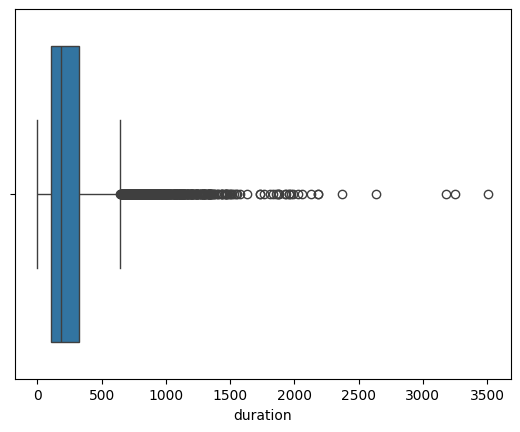

In [10]:
import seaborn as sns
sns.boxplot(x=df['duration'])

In [11]:
df['duration'].median()

180.0

In [45]:
df['duration'].mean()

259.66917567075393

In [12]:
df['duration'].fillna(180, inplace = True)
df['job'].fillna('admin', inplace = True)

C:\Users\srbol\AppData\Local\Temp\ipykernel_22920\1970328117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna('admin', inplace = True)


In [13]:
df.isna().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

ada beberapa kolom yang memiliki "unknown", itu merupakan juga missing value, hal ini juga harus dihandle. Bisa diganti dengan nilai modus dari setiap kolomnya, atau bisa kita lakukan encoding nantinya. Namun apabila nilai dari unknown itu lumayan besar maka saya tidak bisa menggantinya dengan modus karena akan menghasilkan perubahan pada data asli secara signifikan dan malah mengubah data tersebut terlalu banyak

In [14]:
df.tail()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
8232,8232,45,retired,divorced,university.degree,no,yes,no,cellular,jul,tue,372.0,4,999,0,nonexistent,no
8233,8233,51,technician,married,university.degree,no,yes,no,cellular,aug,wed,512.0,5,999,0,nonexistent,yes
8234,8234,52,admin.,divorced,university.degree,no,no,no,telephone,jun,mon,201.0,3,999,0,nonexistent,no
8235,8235,51,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,16.0,9,999,0,nonexistent,no
8236,8236,46,blue-collar,married,basic.4y,unknown,yes,yes,telephone,may,wed,125.0,1,999,0,nonexistent,no


In [15]:
unknown_counts = {}

# Iterate over each column
for col in df.columns:
    # Count occurrences of 'unknown'
    unknown_counts[col] = (df[col] == 'unknown').sum()
print("Occurrences of 'unknown' in each column:")
for col, count in unknown_counts.items():
    print(f"{col}: {count}")

Occurrences of 'unknown' in each column:
Unnamed: 0: 0
age: 0
job: 66
marital: 21
education: 357
default: 1740
housing: 196
loan: 196
contact: 0
month: 0
day_of_week: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
y: 0


In [16]:
df['job'].value_counts()

job
admin.           2084
blue-collar      1865
technician       1312
services          801
management        612
retired           308
self-employed     288
entrepreneur      288
housemaid         221
unemployed        209
student           176
unknown            66
admin               7
Name: count, dtype: int64

In [17]:
df['job'].replace('admin.', 'admin', inplace=True)

In [18]:
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['marital'] = df['marital'].replace('unknown', df['marital'].mode()[0])
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])


Unknown sudah sukses diganti dengan nilai modus, dimana pada kolom ini adalah admin

In [19]:
df['job'].value_counts()

job
admin            2157
blue-collar      1865
technician       1312
services          801
management        612
retired           308
self-employed     288
entrepreneur      288
housemaid         221
unemployed        209
student           176
Name: count, dtype: int64

In [20]:
unknown_counts = {}

for col in df.columns:
    unknown_counts[col] = (df[col] == 'unknown').sum()
print("Occurrences of 'unknown' in each column:")
for col, count in unknown_counts.items():
    print(f"{col}: {count}")

Occurrences of 'unknown' in each column:
Unnamed: 0: 0
age: 0
job: 0
marital: 0
education: 357
default: 1740
housing: 0
loan: 0
contact: 0
month: 0
day_of_week: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
y: 0


Untuk kedua kolom dibawah ini akan dilakukan encoding untuk penanganannya karena jumlah unknown yang ada lumayan besar dibandingkan kolom lainnya. Contohnya seperti default, kita tidak bisa menggantinya dengan modus karena seluruh kolom akan menjadi 'no'.

Kolom default memiliki 2 opsi sekarang, melakukan drop pada seluruh kolomnya karena terlalu banyak missing data, atau melakukan encoding. Pada penjelasan soal, tertulis kalau seharusnya ada 3 jenis respon yaitu no, yes, dan unknown. Saya akan melakukan encoding saja dan membiarkannya seolah2 unknown tersebut adalah 'ya'

Kedua kolom ini akan saya biarkan terlebih dahulu karena nanti akan saya lakukan label encoding, dan scaling

In [21]:
df['default'].value_counts()

default
no         6497
unknown    1740
Name: count, dtype: int64

In [22]:
df['education'].value_counts()

education
university.degree      2506
high.school            1874
basic.9y               1206
professional.course    1022
basic.4y                807
basic.6y                462
unknown                 357
illiterate                3
Name: count, dtype: int64

**Label Encoder**

In [23]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
month_map = {}

for i in range(12):
    month_map.update({datetime(2020, i+1, 1).strftime('%b').lower(): i})
month_map

binary_map = {'yes': 1, 'no': 0}
encode_map = {
    'month': month_map,
    'day_of_week': {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4},
    'default': binary_map,
    'housing': binary_map,
    'loan': binary_map,
    'y': binary_map
}

In [24]:
lists = []

for i in df:
    if(df[i].dtypes == 'object'):

        if(i in encode_map.keys()):
            df[i] = df[i].replace(encode_map[i])
            lists.append(encode_map[i])
            continue
        
        df[i] = encode.fit_transform(df[i])
        lists.append(dict(zip(encode.classes_, encode.transform(encode.classes_))))

C:\Users\srbol\AppData\Local\Temp\ipykernel_22920\1535559982.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace(encode_map[i])
C:\Users\srbol\AppData\Local\Temp\ipykernel_22920\1535559982.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace(encode_map[i])
C:\Users\srbol\AppData\Local\Temp\ipykernel_22920\1535559982.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects

In [25]:
lists

[{'admin': 0,
  'blue-collar': 1,
  'entrepreneur': 2,
  'housemaid': 3,
  'management': 4,
  'retired': 5,
  'self-employed': 6,
  'services': 7,
  'student': 8,
  'technician': 9,
  'unemployed': 10},
 {'divorced': 0, 'married': 1, 'single': 2},
 {'basic.4y': 0,
  'basic.6y': 1,
  'basic.9y': 2,
  'high.school': 3,
  'illiterate': 4,
  'professional.course': 5,
  'university.degree': 6,
  'unknown': 7},
 {'yes': 1, 'no': 0},
 {'yes': 1, 'no': 0},
 {'yes': 1, 'no': 0},
 {'cellular': 0, 'telephone': 1},
 {'jan': 0,
  'feb': 1,
  'mar': 2,
  'apr': 3,
  'may': 4,
  'jun': 5,
  'jul': 6,
  'aug': 7,
  'sep': 8,
  'oct': 9,
  'nov': 10,
  'dec': 11},
 {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4},
 {'failure': 0, 'nonexistent': 1, 'success': 2},
 {'yes': 1, 'no': 0}]

In [46]:
lists[1]['single']

2

In [47]:
for i in range(len(lists)):
    print('yes' in lists[i])

False
False
False
True
True
True
False
False
False
False
True


In [28]:
df['default'].value_counts()

default
0          6497
unknown    1740
Name: count, dtype: int64

In [29]:
df['default'].replace(('unknown', '1'), inplace = True)

C:\Users\srbol\AppData\Local\Temp\ipykernel_22920\871957175.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['default'].replace(('unknown', '1'), inplace = True)
C:\Users\srbol\AppData\Local\Temp\ipykernel_22920\871957175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['default'].replace(('unknown', '1'), inplace = True)


In [30]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,28,0,2,6,0,1,0,1,4,4,1128.0,3,999,0,1,0
1,1,30,0,2,6,0,0,0,0,4,3,199.0,1,999,0,1,0
2,2,49,6,0,6,0,1,0,0,6,2,1124.0,2,999,0,1,1
3,3,33,4,1,3,0,1,0,1,4,4,178.0,2,999,0,1,0
4,4,50,7,1,7,0,0,0,1,4,1,144.0,1,999,0,1,0


**Splitting Data**

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['y'],axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6589, 16), (1648, 16), (6589,), (1648,))

In [32]:
X_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
X_test.drop(columns = 'Unnamed: 0', axis = 1, inplace=True)
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
3805,46,1,1,1,0,1,0,0,7,1,398.0,3,999,0,1
5899,30,4,2,3,0,0,0,0,10,3,952.0,2,999,0,1
5022,26,9,2,5,0,1,0,0,6,2,578.0,1,999,0,1
4556,48,1,1,1,0,1,0,1,5,0,261.0,8,999,0,1
4139,31,8,2,7,0,0,1,0,4,0,535.0,2,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,52,2,1,6,0,0,0,1,4,0,151.0,1,999,0,1
5191,78,5,1,2,0,1,0,1,9,3,321.0,1,999,0,1
5390,42,9,1,5,0,0,1,1,4,2,96.0,5,999,0,1
860,33,1,0,0,0,1,0,0,7,1,395.0,1,999,0,1


In [33]:
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,28,0,2,6,0,1,0,1,4,4,1128.0,3,999,0,1,0
1,1,30,0,2,6,0,0,0,0,4,3,199.0,1,999,0,1,0
2,2,49,6,0,6,0,1,0,0,6,2,1124.0,2,999,0,1,1
3,3,33,4,1,3,0,1,0,1,4,4,178.0,2,999,0,1,0
4,4,50,7,1,7,0,0,0,1,4,1,144.0,1,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,8232,45,5,0,6,0,1,0,0,6,1,372.0,4,999,0,1,0
8233,8233,51,9,1,6,0,1,0,0,7,2,512.0,5,999,0,1,1
8234,8234,52,0,0,6,0,0,0,1,5,0,201.0,3,999,0,1,0
8235,8235,51,1,1,0,0,0,0,1,5,3,16.0,9,999,0,1,0


In [34]:
lists

[{'admin': 0,
  'blue-collar': 1,
  'entrepreneur': 2,
  'housemaid': 3,
  'management': 4,
  'retired': 5,
  'self-employed': 6,
  'services': 7,
  'student': 8,
  'technician': 9,
  'unemployed': 10},
 {'divorced': 0, 'married': 1, 'single': 2},
 {'basic.4y': 0,
  'basic.6y': 1,
  'basic.9y': 2,
  'high.school': 3,
  'illiterate': 4,
  'professional.course': 5,
  'university.degree': 6,
  'unknown': 7},
 {'yes': 1, 'no': 0},
 {'yes': 1, 'no': 0},
 {'yes': 1, 'no': 0},
 {'cellular': 0, 'telephone': 1},
 {'jan': 0,
  'feb': 1,
  'mar': 2,
  'apr': 3,
  'may': 4,
  'jun': 5,
  'jul': 6,
  'aug': 7,
  'sep': 8,
  'oct': 9,
  'nov': 10,
  'dec': 11},
 {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4},
 {'failure': 0, 'nonexistent': 1, 'success': 2},
 {'yes': 1, 'no': 0}]

In [35]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
706,48,2,1,6,0,1,0,1,4,2,122.0,1,999,0,1
5325,30,7,2,3,0,0,0,1,5,2,245.0,1,999,0,1
1665,21,8,2,3,0,0,0,0,5,3,400.0,1,999,0,1
6675,46,4,1,1,0,0,0,0,4,0,966.0,1,999,0,1
5605,51,9,1,5,0,1,0,1,7,4,115.0,2,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,38,0,1,3,0,0,0,0,7,2,289.0,2,999,0,1
296,25,0,2,3,0,0,0,1,4,1,268.0,3,999,0,1
6451,43,4,1,6,0,1,1,1,5,1,435.0,3,999,0,1
57,41,1,1,1,0,0,0,1,4,4,407.0,4,999,0,1


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
X_test

array([[ 0.78342888, -0.45951361, -0.30019055, ...,  0.19609892,
        -0.34530362,  0.18868971],
       [-0.94904859,  0.95280806,  1.35777721, ...,  0.19609892,
        -0.34530362,  0.18868971],
       [-1.81528733,  1.23527239,  1.35777721, ...,  0.19609892,
        -0.34530362,  0.18868971],
       ...,
       [ 0.30218513,  0.10541506, -0.30019055, ...,  0.19609892,
        -0.34530362,  0.18868971],
       [ 0.10968764, -0.74197795, -0.30019055, ...,  0.19609892,
        -0.34530362,  0.18868971],
       [-0.94904859, -0.74197795, -0.30019055, ...,  0.19609892,
        -0.34530362,  0.18868971]])

**OVER SAMPLING LR**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Initialize RandomizedSearchCV for Logistic Regression
rcv = RandomizedSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, n_iter=10, random_state=42)

# Fit RandomizedSearchCV on the resampled training data
rcv.fit(X_train_resampled, y_train_resampled)

# Predictions on the testing data
y_pred_lr = rcv.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_lr)
print(f'\nBest Parameters of Logistic Regression model are: {rcv.best_params_}\n')
print(f'Accuracy: {accuracy:.2f}\n')

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1453
           1       0.40      0.78      0.53       195

    accuracy                           0.84      1648
   macro avg       0.69      0.81      0.72      1648
weighted avg       0.90      0.84      0.86      1648

Confusion Matrix:
 [[1228  225]
 [  42  153]]

Best Parameters of Logistic Regression model are: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

Accuracy: 0.84



In [39]:
rocAUC = roc_auc_score(y_test, y_pred_lr)
print(rocAUC)

0.814881677166605


**OVER SAMPLING Gradient Boosting**

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_resampled, y_train_resampled)
y_pred_proba = gbm.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

y_pred = gbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.92
Accuracy Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1453
           1       0.59      0.71      0.64       195

    accuracy                           0.91      1648
   macro avg       0.77      0.82      0.79      1648
weighted avg       0.92      0.91      0.91      1648



In [41]:
df['y'].value_counts()

y
0    7258
1     979
Name: count, dtype: int64

In [42]:
from Encoder.Encoder import Encoder

In [43]:
apapun = Encoder(lists)

In [44]:
import pickle as pkl

pkl.dump(gbm, open("GBM.pkl", "wb"))
pkl.dump(apapun, open("Encoder.pkl", "wb"))
